# An analysis of the State of the Union speeches - Part 5

In this notebook, you should explore one question or idea of your own from this dataset.  Provide the code and computations here, and summarize your points in the [main](main.ipynb) notebook.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import shelve
import nltk
import re
from collections import Counter
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
addresses = pd.read_hdf('results/df2.h5', 'addresses')
with shelve.open('results/vars1') as db:
    speeches = db['speeches']


One of the core components of our daily lives is the state of the economy. We are curious about how often terms such as dollar, employ, and inflation, and economy are mentioned. We will also look at how often in general numbers and percentages were used by the presidents in these speeches.

In [3]:
number_count = []
percent_count = []
dollar_count = []
employ_count = []
inflation_count = []
economy_count = []
for speech in speeches:
    counter = Counter(nltk.word_tokenize(speech))
    #Common use of percentages
    percent = counter["%"] + counter["percent"] + counter["percentage"]
    #Common use of dollars
    dollar = counter["$"] + counter["dollar"] + counter["dollars"]
    #We do not really need nltk in this case since we do not need to tokenize words and just find instances of occurence. 
    number_count.append(len(re.findall("[0-9]+", " ".join(speech.split()))) - 2) #All of the headers have 2 numbers from the date
    employ_count.append(len(re.findall("employ", " ".join(speech.split())))) #both employment and unemployment is captured
    inflation_count.append(len(re.findall("inflation", " ".join(speech.split()))))
    economy_count.append(len(re.findall("economy", " ".join(speech.split()))))
    percent_count.append(percent)
    dollar_count.append(dollar)


    

addresses["Number Count"] = number_count
addresses["Percent Count"] = percent_count
addresses["Dollar Count"] = dollar_count
addresses["Employ Count"] = employ_count
addresses["Inflation Count"] = inflation_count
addresses["Economy Count"] = economy_count

In [4]:
addresses[["Number Count", "Percent Count", "Dollar Count", "Employ Count", "Inflation Count", "Economy Count"]].describe()

,Number Count,Percent Count,Dollar Count,Employ Count,Inflation Count,Economy Count
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,104.330396,2.052863,17.127753,5.726872,1.070485,3.704846
std,128.735653,4.716458,23.762030,8.495461,2.925984,4.942691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,4.000000,2.000000,0.000000,0.500000
50%,61.000000,0.000000,11.000000,3.000000,0.000000,2.000000
75%,138.500000,2.000000,22.500000,7.000000,1.000000,5.000000
max,837.000000,50.000000,252.000000,91.000000,24.000000,32.000000


Out of all the economic terms, the dollar had the highest mean mentions in a speech of 17.127, which is not surprising since the dollar is used when talking about any kind of spending, stimulus, etc. Employment had the next highest mean mentions of 5.727 while inflation had the lowest mean mentions of 1.07, which is not surprising since presidents tend to care more about employment while the Federal Reserve cares more about inflation. Interestingly enough, the term "economy" itself is not used that often, with a mean of 3.705 mentions in a speech, even though we would expect the presidents to talk more about the general economy. However, it is possible that the presidents would say something like "I would now like to address about the current state of the economy" and then go more into specifics like employment. 

Let's make some graphs about this data.

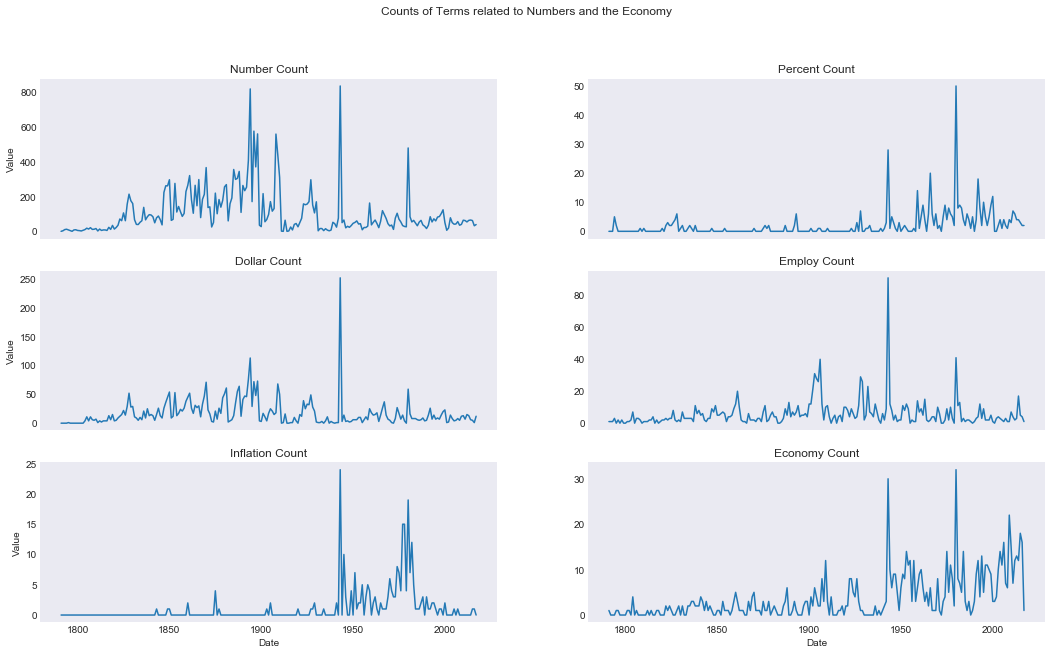

In [5]:
graph_data = addresses[["Number Count", "Percent Count", "Dollar Count", "Employ Count", "Inflation Count", "Economy Count"]]
graph_data.index = range(1791, 2018)

# Layout the plots
fig, axs = plt.subplots(nrows=3, ncols=2,sharex = True, figsize=(18,10))
fig.suptitle('Counts of Terms related to Numbers and the Economy')
 
# Define titles and sub-plot positions for each of the six categories 
titles = ["Number Count", "Percent Count", "Dollar Count", "Employ Count", "Inflation Count", "Economy Count"]
positions = [axs[0,0], axs[0,1], axs[1,0], axs[1,1], axs[2,0], axs[2,1]]
# Create 6 plots using loop
for i in range(0, 6):
    ax = positions[i]
    ax.plot(graph_data.iloc[:,i], color = '#2479b5')
    ax.set_title(titles[i])
    ax.set_ylabel("Value")
    if(i in [1,3,5]): ax.set_ylabel('')
    if(i in [4, 5]): ax.set_xlabel('Date')
fig.savefig("fig/numbers_graphs.png")

Interesting, there is a large spike for all of these statistics just before 1950 and one around 1980. Let's see what is going on.

In [6]:
print("Speech with highest mention of number, dollar, inflation, and employ")
print(addresses[addresses["Dollar Count"] == addresses["Dollar Count"].max()][["president", "date"]])
print()
print("Speech with highest mention of percent, economy")
print(addresses[addresses["Economy Count"] == addresses["Economy Count"].max()][["president", "date"]])

Speech with highest mention of number, dollar, inflation, and employ
           president       date
152  Harry S. Truman 1946-01-21

Speech with highest mention of percent, economy
        president       date
189  Jimmy Carter 1981-01-16


World War II ended in September of 1945. As such, the American people no longer needed to worry about war and instead can focus back on the economy. While World War II brought the United States out of the Great Depression, there is no doubt that the fear of an economic downturn still lingers in the minds of many, and Harry Truman needed to address these concerns.

During the 1970s, an economic phenomenon known as stagflation hit the United States. By conventional Keynesian theory, when unemployment goes up, inflation goes down and vice versa. Yet, in this decade both unemployment and inflation went up together, resulting in an economic crisis never seen before. By the late 1970s, new theory had been developed to tackle this problem. It makes sense that inflation was constantly mentioned throughout these years and that Jimmy Carter talked so much about the general economy.


We are now interested in the two modern major parties. Does one of the party care more about the economy than the other? We will have to discard some of the presidents since they did not belong in either party, especially the early ones since these parties did not even exist yet.

In [7]:
pd.options.mode.chained_assignment = None #Disable warning for chained assignment
democrats = ["Andrew Jackson", "Martin van Buren", "James Polk", "Franklin Pierce", "James Buchanan", "Grover Cleveland",
            "Franklin D. Roosevelt", "John F. Kennedy", "Lyndon B. Johnson", "Jimmy Carter", "William J. Clinton", "Barack Obama"]
republicans = ["Abraham Lincoln", 'Ulysses S. Grant','Rutherford B. Hayes', 'Chester A. Arthur', 'Benjamin Harrison', 'William McKinley',
              'Theodore Roosevelt',  'William H. Taft', 'Warren Harding', 'Calvin Coolidge', 'Herbert Hoover', 'Dwight D. Eisenhower',
              'Richard Nixon', 'Gerald R. Ford', 'Ronald Reagan', 'George H.W. Bush', 'George W. Bush']
addresses_democrat = addresses[addresses["president"].isin(democrats)]
addresses_democrat["Party"] = "Democrat"
addresses_republican = addresses[addresses["president"].isin(republicans)]
addresses_republican["Party"] = "Republican"
print("Democrat Presidents")
print(addresses_democrat[["president", "date"]].head(10))
print()
print("Republican Presidents")
print(addresses_republican[["president", "date"]].head(10))

Democrat Presidents
           president       date
40    Andrew Jackson 1829-12-08
41    Andrew Jackson 1830-12-06
42    Andrew Jackson 1831-12-06
43    Andrew Jackson 1832-12-04
44    Andrew Jackson 1833-12-03
45    Andrew Jackson 1834-12-01
46    Andrew Jackson 1835-12-07
47    Andrew Jackson 1836-12-05
48  Martin van Buren 1837-12-05
49  Martin van Buren 1838-12-03

Republican Presidents
           president       date
72   Abraham Lincoln 1861-12-03
73   Abraham Lincoln 1862-12-01
74   Abraham Lincoln 1863-12-08
75   Abraham Lincoln 1864-12-06
80  Ulysses S. Grant 1869-12-06
81  Ulysses S. Grant 1870-12-05
82  Ulysses S. Grant 1871-12-04
83  Ulysses S. Grant 1872-12-02
84  Ulysses S. Grant 1873-12-01
85  Ulysses S. Grant 1874-12-07


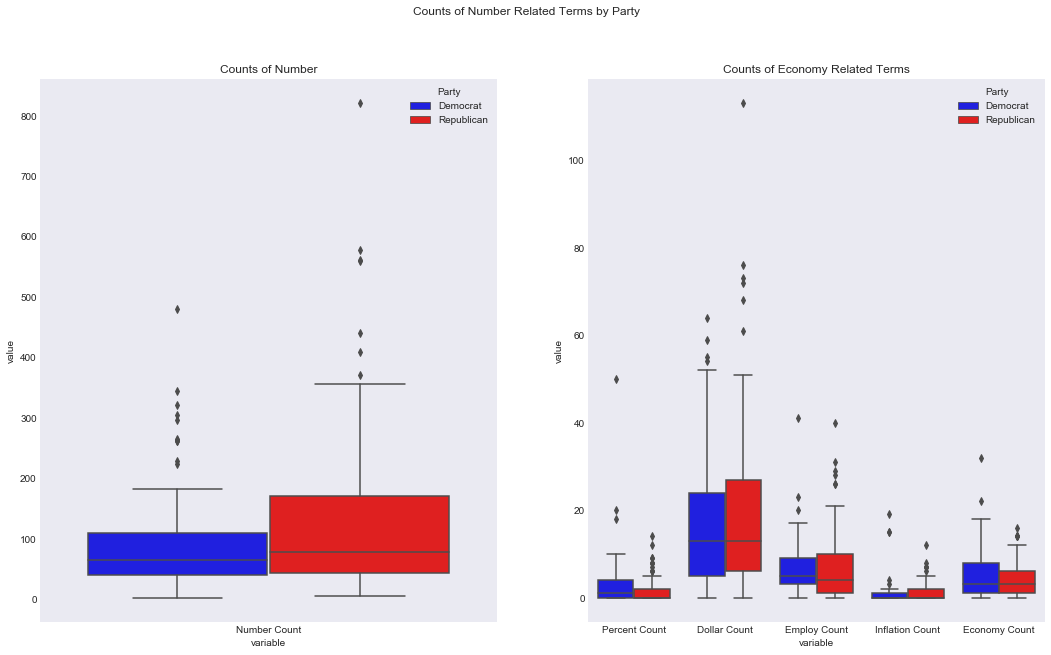

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
fig.suptitle('Counts of Number Related Terms by Party')

ax1 = axs[0]
plot_data = pd.concat([addresses_democrat, addresses_republican])
plot_data = plot_data[["Number Count", "Party"]]
plot_data = plot_data.melt("Party")
sns.boxplot(data=plot_data, x="variable", y="value", 
               hue="Party", palette = ["blue", "red"], ax = ax1) 
ax1.set_title("Counts of Number")


ax2 = axs[1]
plot_data = pd.concat([addresses_democrat, addresses_republican])
plot_data = plot_data[["Percent Count", "Dollar Count", "Employ Count", "Inflation Count", "Economy Count", "Party"]]
plot_data = plot_data.melt("Party")

 
sns.boxplot(data=plot_data, x="variable", y="value", 
               hue="Party", palette = ["blue", "red"], ax = ax2)

ax2.set_title("Counts of Economy Related Terms");
fig.savefig("fig/party_counts.png")


In general, besides the outliers, there does not seem to be any siginificant difference between how often economic terms are used by presidents of both parties, which is not surprising, since both parties care about the economy. It seems that Republicans talk about numbers (0-9) more than Democrats, especially those outlier republican presidents.

Let's also look at the speech characteristics of the two parties and how they change over time.

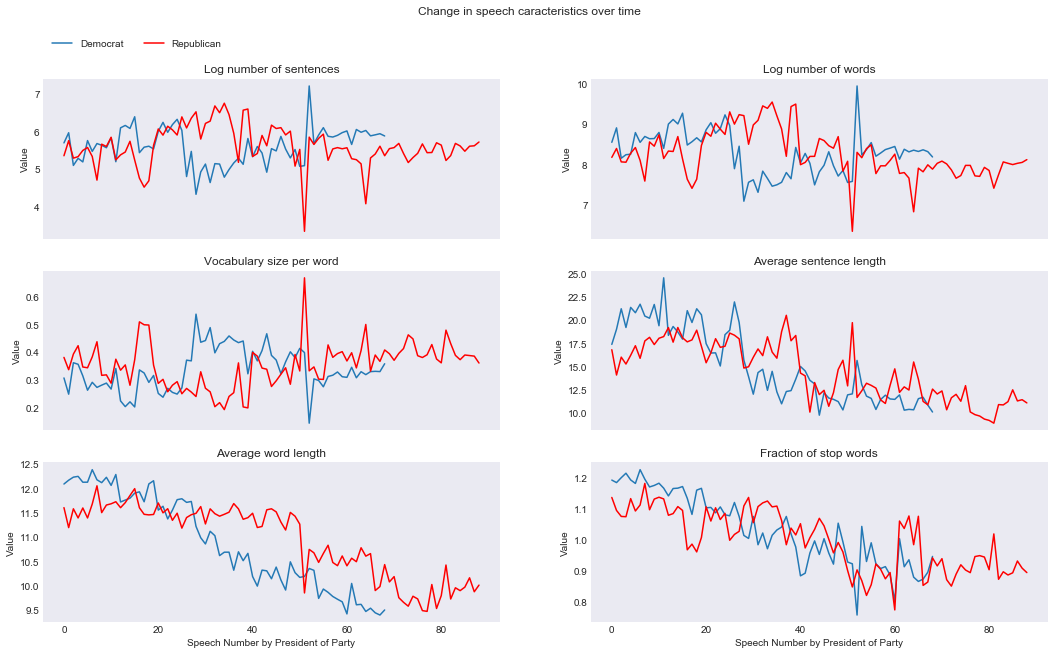

In [9]:
# `graph_data` is the cleaned data for graph
graph_data_democrat = addresses_democrat[["logn_sent", "logn_words", "vocab_per_word",
                          "word_per_sent", "char_per_word", "frac_stop"]].reset_index(drop = True)
graph_data_republican = addresses_republican[["logn_sent", "logn_words", "vocab_per_word",
                          "word_per_sent", "char_per_word", "frac_stop"]].reset_index(drop = True)

# layout the plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 10), sharex = True)
fig.suptitle('Change in speech caracteristics over time')
 
# create 6 plots
titles = ['Log number of sentences', 'Log number of words', 'Vocabulary size per word', 'Average sentence length',
         'Average word length', 'Fraction of stop words']
positions = [axs[0,0], axs[0,1], axs[1,0], axs[1,1], axs[2,0], axs[2,1]]
for i in range(0, 6):
    ax = positions[i]
    ax.plot(graph_data_democrat.iloc[:,i], color = '#2479b5', label = "Democrat")
    ax.plot(graph_data_republican.iloc[:,i], color = 'red', label = "Republican")

    ax.set_title(titles[i])
    ax.set_ylabel('Value')
    if(i in [4, 5]): ax.set_xlabel('Speech Number by President of Party')
axs.flatten()[0].legend(loc = "upper left", bbox_to_anchor = (0, 1.3), ncol=3);
fig.savefig("fig/party_characteristics.png")

Both parties seem to have a similar trend for all characteristics. The average word length, sentence length, and fraction of stop words all have a decreasing trend while there does not seem to be a trend for log number of sentences, vocabulary size per word, and log number of words for both parties. Note that we cannot do any comparisions between the two parties since we do not account for when the presidency actually happened. The first Democrat president was Andrew Jackson in 1829 while the first Republican president was Abraham Lincoln in 1861, so there are so many external factors we do not account for. We are just looking at the trend within the party. 

In [10]:
addresses.to_hdf('results/df5.h5', 'addresses')
